# Gemaakt op 08/05/2025 door martijn

In [5]:
import pandas as pd
import seaborn as sns
import numpy as np
import scipy.stats as st

### Portfolio assignment 13
10 min: Do a bivariate analysis on the penguins dataset for the following combination of columns:
- species VS sex
- island VS sex

For this bivariate analysis, at least perform the following tasks:
- Do you expect their to be a correlation between the two columns?
- Create a contingency table. Do you observe different ratios between categories here?
- Create a bar plot for this contingency table. Do you observe different ratios between categories here?
- Do a chi-squared test. What does the result say? What's the chance of there being a correlation between the two columns?

In [6]:
penguins = sns.load_dataset("penguins")
penguins.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female


## assumptions

### species vs sex
- Do you expect their to be a correlation between the two columns?

no, it would be bad if the sex isn't in balence, cause that would either mean that they can't reproduce to the best potential, or that 1 sex is extremely bad at surviving. so that is wy i think it will be about the same amount of each tex with each species

### island vs sex
- Do you expect their to be a correlation between the two columns?

maybe that there will be an island with mre males and and island with more females, but yet again i think it will be about the same for each island, cause it would need to be roughly balanced to survive right?


In [12]:
from scipy.stats import chi2_contingency

def create_contingency_table(dataset, column1, column2):
    return dataset.groupby([column1, column2]).size().unstack(column1, fill_value=0)

def check_cat_vs_cat_correlation(dataset, column1, column2):
    contingency_table = create_contingency_table(dataset, column1, column2)
    chi2 = chi2_contingency(contingency_table)
    print(chi2)
    p_value = chi2[1]
    odds_of_correlation = 1 - p_value
    print(
        f"The odds of a correlation between {column1} and {column2} is {odds_of_correlation * 100}% (Based on a p value of {p_value}).")
    print("This percentage needs to be at least 95% for a significant correlation.")

In [9]:
penguinsContingencyTable = create_contingency_table(penguins, 'species','sex')
penguinsContingencyTable

species,Adelie,Chinstrap,Gentoo
sex,,,
Female,73,34,58
Male,73,34,61


it is almost exactly the sme, just as I expected.

<Axes: xlabel='sex'>

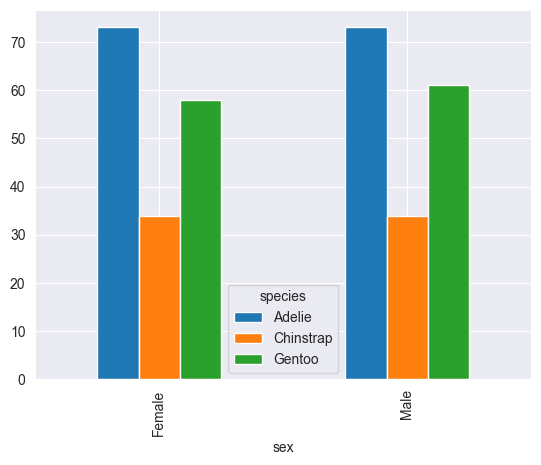

In [10]:
penguinsContingencyTable.plot(kind='bar')

it is still exactly the same. just as i expected

In [13]:
check_cat_vs_cat_correlation(penguins, 'species','sex')

Chi2ContingencyResult(statistic=np.float64(0.04860717014078319), pvalue=np.float64(0.9759893689765846), dof=2, expected_freq=array([[72.34234234, 33.69369369, 58.96396396],
       [73.65765766, 34.30630631, 60.03603604]]))
The odds of a correlation between species and sex is 2.4010631023415385% (Based on a p value of 0.9759893689765846).
This percentage needs to be at least 95% for a significant correlation.


ja, de kans is veel te laag om een significante correlatie te zien. zoals ik al dacht

In [14]:
penguinsContingencyTable = create_contingency_table(penguins, 'island','sex')
penguinsContingencyTable

island,Biscoe,Dream,Torgersen
sex,,,
Female,80,61,24
Male,83,62,23


zoals ik verwachtte, het is inderdaad weer het zelfde.

<Axes: xlabel='sex'>

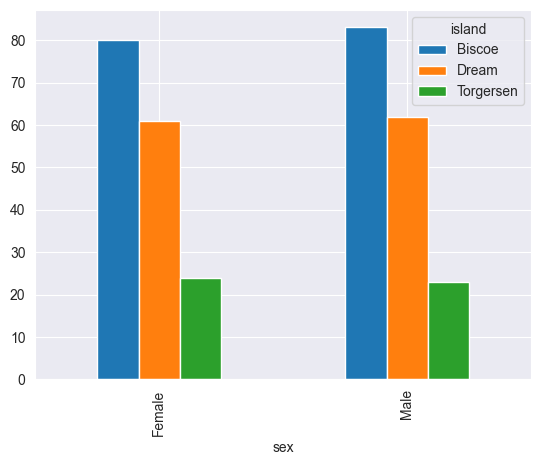

In [15]:
penguinsContingencyTable.plot(kind='bar')

jep het is inderdaad ongeveer het zelfde

In [16]:
check_cat_vs_cat_correlation(penguins, 'island','sex')

Chi2ContingencyResult(statistic=np.float64(0.05759904881286206), pvalue=np.float64(0.971611229281065), dof=2, expected_freq=array([[80.76576577, 60.94594595, 23.28828829],
       [82.23423423, 62.05405405, 23.71171171]]))
The odds of a correlation between island and sex is 2.8388770718934975% (Based on a p value of 0.971611229281065).
This percentage needs to be at least 95% for a significant correlation.


de kans om een significante correlatie is is veel te laag. zoals verwacht.